In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA

sns.set(style="whitegrid")


In [2]:
# Load Zoo dataset
df = pd.read_csv('Zoo.csv')

print('Dataset shape:', df.shape)
display(df.head())
print('\nColumns:', df.columns.tolist())


Dataset shape: (101, 18)


,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1



Columns: ['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'type']


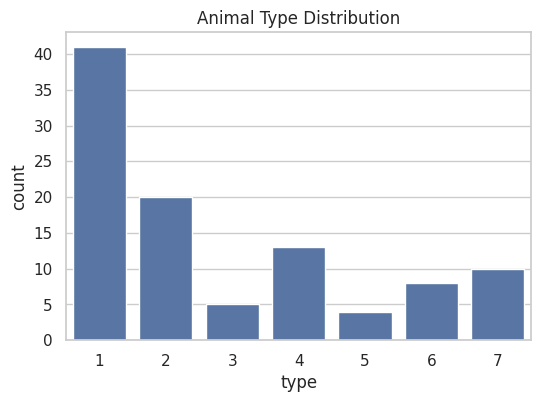

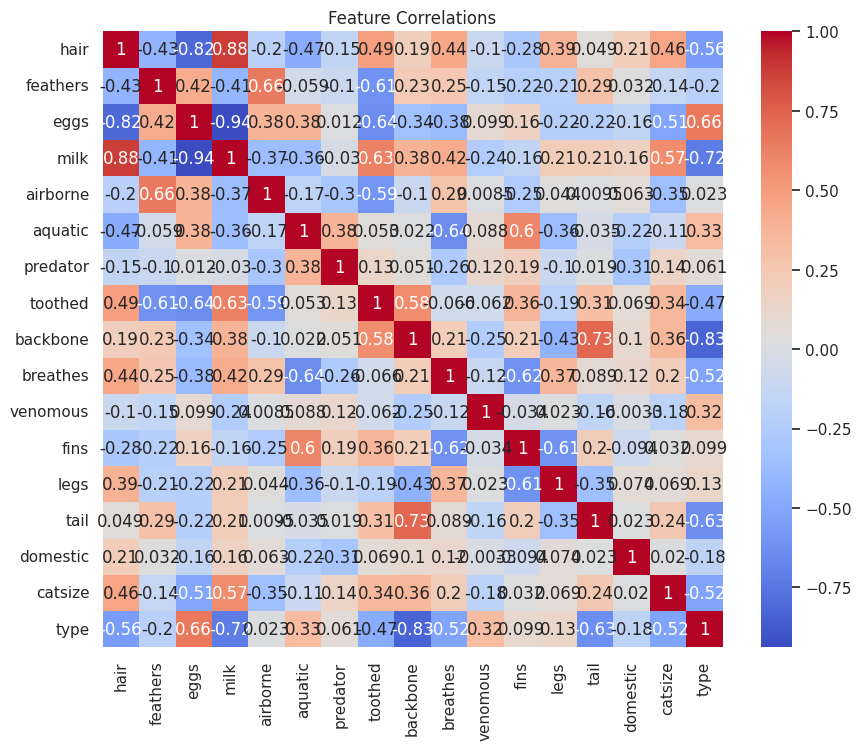

In [4]:
# Class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='type', data=df)
plt.title('Animal Type Distribution')
plt.show()

# Correlation heatmap of numeric columns
plt.figure(figsize=(10,8))
sns.heatmap(df.drop('animal name', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlations')
plt.show()


Missing values:
 animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


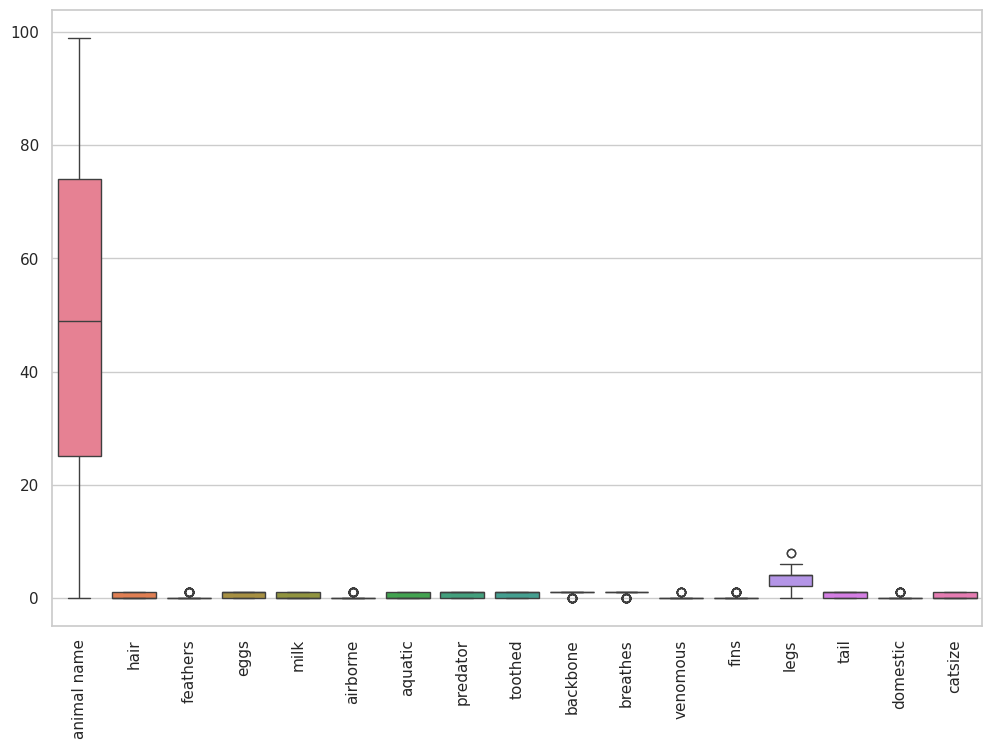

In [5]:
# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Convert categorical features to numbers if needed
for col in df.columns:
    if df[col].dtype == 'O':
        df[col] = df[col].astype('category').cat.codes

display(df.head())

# Check for outliers (basic boxplot)
plt.figure(figsize=(12,8))
sns.boxplot(data=df.drop(columns=['type']))  # type is target
plt.xticks(rotation=90)
plt.show()


In [6]:
X = df.drop(columns=['type'])
y = df['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (80, 17)
Test shape: (21, 17)


In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


100%|██████████| 20/20 [00:00<00:00, 185.82it/s]


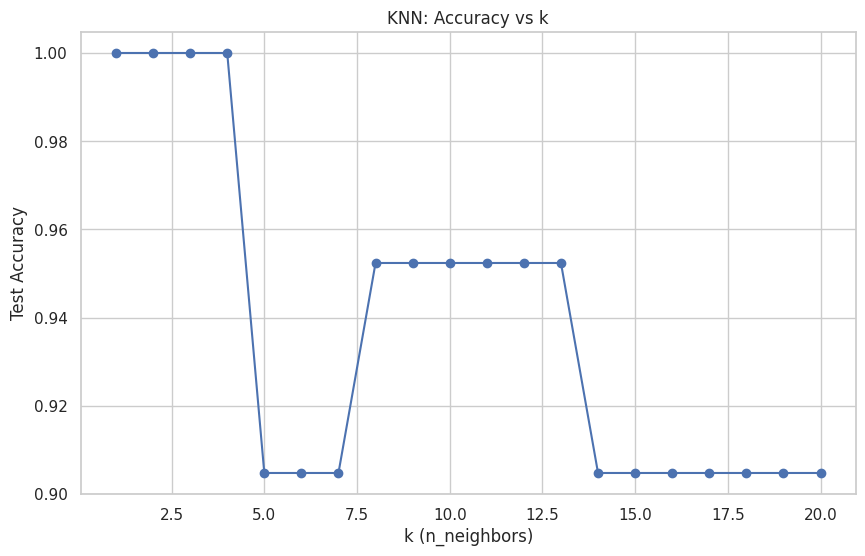

Best k value: 1 with accuracy 1.0000


In [8]:
# Try different k values (1 to 20) to find best k
from tqdm import tqdm  # Optional, can remove tqdm if not installed

k_range = list(range(1, 21))
accuracies = []

for k in tqdm(k_range):
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plot accuracy vs k
plt.figure(figsize=(10,6))
plt.plot(k_range, accuracies, marker='o')
plt.xlabel('k (n_neighbors)')
plt.ylabel('Test Accuracy')
plt.title('KNN: Accuracy vs k')
plt.grid(True)
plt.show()

best_k = k_range[np.argmax(accuracies)]
print(f"Best k value: {best_k} with accuracy {max(accuracies):.4f}")


Final Model Metrics:
Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1-score : 1.0


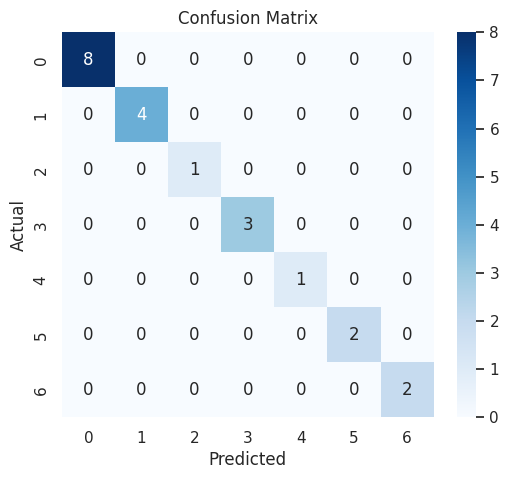


Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



In [9]:
knn_final = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
knn_final.fit(X_train_scaled, y_train)
y_pred_final = knn_final.predict(X_test_scaled)

print("Final Model Metrics:")
print("Accuracy :", accuracy_score(y_test, y_pred_final))
print("Precision:", precision_score(y_test, y_pred_final, average='weighted', zero_division=0))
print("Recall   :", recall_score(y_test, y_pred_final, average='weighted', zero_division=0))
print("F1-score :", f1_score(y_test, y_pred_final, average='weighted', zero_division=0))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_final, zero_division=0))


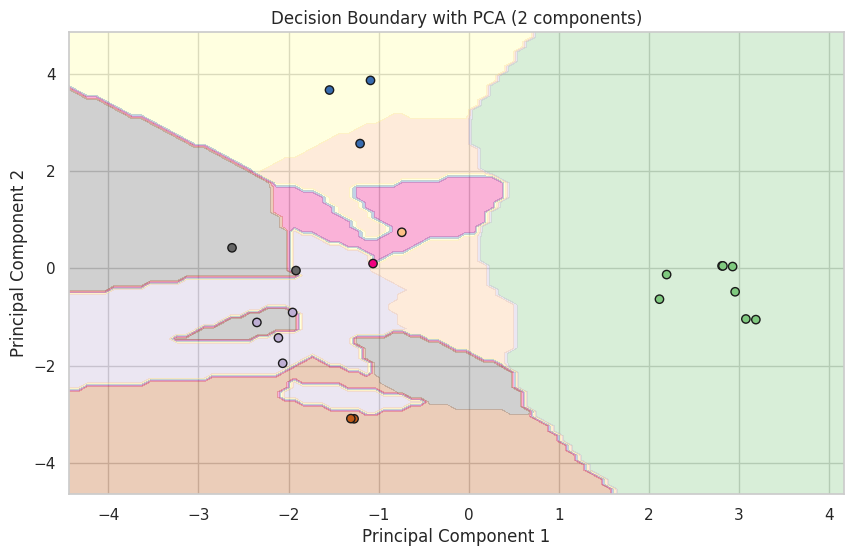

In [10]:
# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train_scaled)
X_test_2d  = pca.transform(X_test_scaled)

knn_2d = KNeighborsClassifier(n_neighbors=best_k)
knn_2d.fit(X_train_2d, y_train)

# Create mesh grid
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='Accent')
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, edgecolor='k', cmap='Accent')
plt.title('Decision Boundary with PCA (2 components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


### Interview Questions

1. **What are the key hyperparameters in KNN?**
   - `n_neighbors (k)`: Number of neighbors to use for classification.
   - `weights`: How neighbors contribute (uniform or distance-based).
   - `metric`: Distance function (e.g., 'euclidean', 'manhattan').

2. **What distance metrics can be used in KNN?**
   - Euclidean (most common)
   - Manhattan
   - Minkowski
   - Cosine
   - Hamming (for categorical data)
